In [ ]:
!pip install tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Add, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train[0].shape

(28, 28)

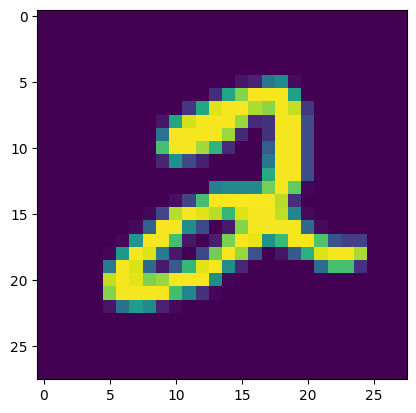

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[5])

In [ ]:
#for faster convergence, bringing all values to the same range 0-1
x_train = x_train/255
x_test = x_test/255

In [ ]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 102282 (399.54 KB)
Trainable params: 102026 (398.54 KB)
Non-trainable params: 256 (1.00 KB)
_________________________________________________________________


In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy']) #for using categorical cross entropy, need to one-hot encode the classes

In [ ]:
model.fit(x_train, y_train, epochs = 10, validation_split = 0.2)

Epoch 1/10
1500/1500 [==============================] - 15s 9ms/step - loss: 0.2532 - accuracy: 0.9254 - val_loss: 0.1314 - val_accuracy: 0.9623
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1225 - accuracy: 0.9636 - val_loss: 0.1015 - val_accuracy: 0.9703
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0906 - accuracy: 0.9727 - val_loss: 0.1086 - val_accuracy: 0.9691
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0751 - accuracy: 0.9775 - val_loss: 0.1022 - val_accuracy: 0.9722
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0625 - accuracy: 0.9807 - val_loss: 0.0899 - val_accuracy: 0.9743
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0530 - accuracy: 0.9828 - val_loss: 0.0898 - val_accuracy: 0.9746
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0453 - accuracy: 0.9855 - val_loss: 0.0936 - val_accurac

In [ ]:
y_prob = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred = y_prob.argmax(axis = 1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9759

In [ ]:
model2 = Sequential()
model2.add(Flatten(input_shape = (28,28)))
model2.add(Dense(128, activation = 'relu'))
model2.add(Dense(32, activation = 'relu'))
model2.add(Dense(10, activation = 'softmax'))

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model2.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy']) #for using categorical cross entropy, need to one-hot encode the classes

In [ ]:
history = model2.fit(x_train, y_train, epochs = 25, validation_split = 0.2)

Epoch 1/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2862 - accuracy: 0.9175 - val_loss: 0.1399 - val_accuracy: 0.9580
Epoch 2/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1187 - accuracy: 0.9648 - val_loss: 0.1182 - val_accuracy: 0.9642
Epoch 3/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0807 - accuracy: 0.9751 - val_loss: 0.1039 - val_accuracy: 0.9705
Epoch 4/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0605 - accuracy: 0.9814 - val_loss: 0.0963 - val_accuracy: 0.9719
Epoch 5/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0468 - accuracy: 0.9854 - val_loss: 0.0946 - val_accuracy: 0.9762
Epoch 6/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0382 - accuracy: 0.9874 - val_loss: 0.1007 - val_accuracy: 0.9712
Epoch 7/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0313 - accuracy: 0.9897 - val_loss: 0.0976 - val_accuracy:

In [ ]:
y_prob = model2.predict(x_test)
y_pred = y_prob.argmax(axis = 1)
accuracy_score(y_test, y_pred)

313/313 [==============================] - 1s 2ms/step


0.9754

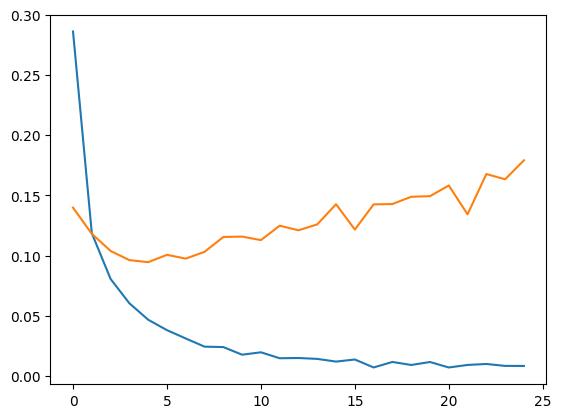

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

this shows the model overfits the data

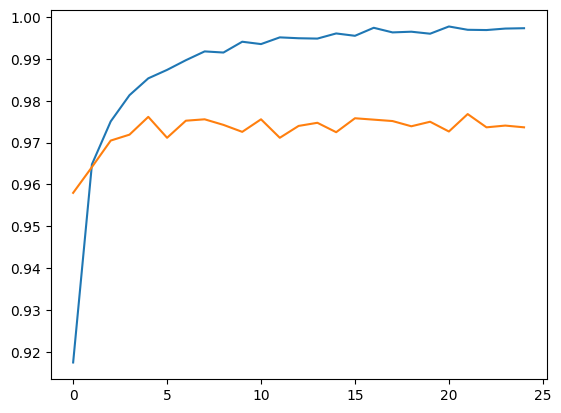

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

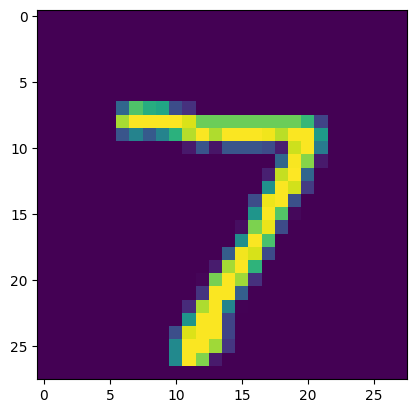

In [ ]:
plt.imshow(x_test[0])

In [ ]:
model.predict(x_test[0].reshape(1,28,28)).argmax(axis = 1)

1/1 [==============================] - 0s 22ms/step


array([7])

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/auto-mpg - auto-mpg.csv')

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
df.shape

(398, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
import numpy as np
df['horsepower'] = df['horsepower'].replace('?',np.nan)

In [ ]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

In [ ]:
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())

In [ ]:
df = df.drop(columns = ['car name'])
# df['horsepower'] = df['horsepower'].astype(int)
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
model = Sequential()
model.add(Dense(7, activation = 'relu', input_dim = 7))
model.add(BatchNormalization())
model.add(Dense(7, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 7)                 56        
                                                                 
 batch_normalization_4 (Bat  (None, 7)                 28        
 chNormalization)                                                
                                                                 
 dense_16 (Dense)            (None, 7)                 56        
                                                                 
 dense_17 (Dense)            (None, 1)                 8         
                                                                 
Total params: 148 (592.00 Byte)
Trainable params: 134 (536.00 Byte)
Non-trainable params: 14 (56.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss = 'mean_squared_error',optimizer = 'Adam')

In [ ]:
history = model.fit(x_train_scaled, y_train, epochs = 150, validation_split = 0.2)

Epoch 1/150
8/8 [==============================] - 1s 23ms/step - loss: 620.7905 - val_loss: 546.7920
Epoch 2/150
8/8 [==============================] - 0s 5ms/step - loss: 616.6611 - val_loss: 544.7788
Epoch 3/150
8/8 [==============================] - 0s 8ms/step - loss: 612.3973 - val_loss: 542.8719
Epoch 4/150
8/8 [==============================] - 0s 5ms/step - loss: 608.0948 - val_loss: 541.0070
Epoch 5/150
8/8 [==============================] - 0s 8ms/step - loss: 604.0870 - val_loss: 539.0104
Epoch 6/150
8/8 [==============================] - 0s 9ms/step - loss: 598.9700 - val_loss: 536.9272
Epoch 7/150
8/8 [==============================] - 0s 6ms/step - loss: 594.3037 - val_loss: 534.6683
Epoch 8/150
8/8 [==============================] - 0s 8ms/step - loss: 589.8827 - val_loss: 532.3359
Epoch 9/150
8/8 [==============================] - 0s 6ms/step - loss: 584.5696 - val_loss: 529.8884
Epoch 10/150
8/8 [==============================] - 0s 8ms/step - loss: 579.0372 - val_los

In [ ]:
y_pred = model.predict(x_test_scaled)

3/3 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8506310260874175

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) =  datasets.cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
y_train = y_train.reshape(-1,)

In [ ]:
def plot_sample(x, y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(x_train[index])
  plt.xlabel(classes[y[index]])

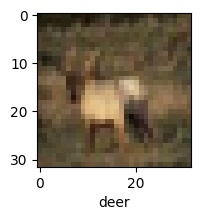

In [ ]:
plot_sample(x_train, y_train, 3)

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
# model = keras.Sequential([
#     Flatten(input_shape = (32,32,3)),
#     Dense(3500, activation = 'relu'),
#     Dense(1500, activation = 'relu'),
#     Dense(10, activation = 'softmax')
# ])

# model.compile(optimizer = 'SGD',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# model.fit(x_train, y_train, epochs = 8)

In [ ]:
input = Input(shape = (32, 32, 3))
flat_layer = Flatten()(input)
layer1 = Dense(256, activation='relu')(flat_layer)
layer2 = Dense(128, activation='relu')(layer1)
layer3 = BatchNormalization()(layer2)
layer3 = Dense(64, activation='relu')(layer3)
layer3 = Dense(128, activation='relu')(layer3)
layer3 = Add()([layer2, layer3])
layer3 = Dense(64, activation='relu')(layer3)
output = Dense(10, activation='softmax')(layer3)
model2 = Model(input, output)
model2.summary()
model2.compile(optimizer = Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 flatten (Flatten)           (None, 3072)                 0         ['input_1[0][0]']             
                                                                                                  
 dense (Dense)               (None, 256)                  786688    ['flatten[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 128)                  32896     ['dense[0][0]']               
                                                                                              

In [ ]:
model2.fit(x_train, y_train, batch_size = 32, epochs = 8, validation_split=0.2)

Epoch 1/8
1250/1250 [==============================] - 19s 14ms/step - loss: 1.8806 - accuracy: 0.3195 - val_loss: 1.8714 - val_accuracy: 0.3392
Epoch 2/8
1250/1250 [==============================] - 20s 16ms/step - loss: 1.6879 - accuracy: 0.3927 - val_loss: 1.8227 - val_accuracy: 0.3652
Epoch 3/8
1250/1250 [==============================] - 17s 14ms/step - loss: 1.6008 - accuracy: 0.4248 - val_loss: 1.6078 - val_accuracy: 0.4218
Epoch 4/8
1250/1250 [==============================] - 17s 13ms/step - loss: 1.5514 - accuracy: 0.4424 - val_loss: 1.6352 - val_accuracy: 0.4092
Epoch 5/8
1250/1250 [==============================] - 18s 14ms/step - loss: 1.5159 - accuracy: 0.4580 - val_loss: 1.6982 - val_accuracy: 0.3988
Epoch 6/8
1250/1250 [==============================] - 17s 13ms/step - loss: 1.4883 - accuracy: 0.4662 - val_loss: 1.6272 - val_accuracy: 0.4197
Epoch 7/8
1250/1250 [==============================] - 17s 14ms/step - loss: 1.4699 - accuracy: 0.4731 - val_loss: 1.6239 - val_ac

In [ ]:
y_prob = model2.predict(x_test)
y_pred = y_prob.argmax(axis = 1)

313/313 [==============================] - 3s 7ms/step


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.4292